<a href="https://colab.research.google.com/github/aljawetz/simple-neural-network-from-scratch/blob/master/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

In [0]:
class FCLayer:
  def __init__(self, input_size, output_size, activation=none):
    self.input_size = input_size
    self.output_size = output_size
    self.activation = activation

    self.weights = np.random.randn(input_size, output_size) / np.sqrt(input_size + output_size)
    self.bias = np.random.randn(1, output_size) / np.sqrt(input_size + output_size)

  def forward_propagation(self, input):
    """
    Calculate the predicted output Y = XW + B
    :param input: Given input
    :return: Predicted output
    """
    self.input = input
    self.output = np.dot(self.input, self.weights) + self.bias
    return self.activation(self.output)

  def backward_propagation(self, output_error, learning_rate):
    """
    Update weights and bias given the output_error
    :param output_error: output_error = dE/dY
    :param learning_rate: Step size at each iteration
    :return: input_error = dE/dX
    """
    output_error *= self.activation(self.output, deriv=True)  
    # dE/dX = dE/dY @ Wt
    input_error = np.dot(output_error, self.weights.T)
    # dE/dW = Xt @ dE/dY
    weights_error = np.dot(self.input.T, output_error)
    # dE/dB = dE/dY
    bias_error = output_error

    # update parameters
    self.weights -= learning_rate * weights_error
    self.bias -= learning_rate * bias_error
    return input_error


In [0]:
def sigmoid(x, deriv=False):
  if deriv:
    return np.exp(-x) / (1 + np.exp(-x))**2
  return 1 / (1 + np.exp(-x))

def tanh(x, deriv=False):
  if deriv:
    return 1 - np.tanh(x)**2
  return np.tanh(x)

def relu(x, deriv=False):
  if deriv:
    return np.array(x >= 0).astype('int')  
  return np.maximum(x, 0)

def none(x, deriv=False):
  if deriv:
    return 1
  return x

In [0]:
def mse(y_true, y_pred, deriv=False):
  if deriv:
    return 2 * (y_pred - y_true) / y_pred.size
  return np.mean(np.power(y_true - y_pred, 2))

def sse(y_true, y_pred, deriv=False):
  if deriv:
    return y_pred - y_true
  return 0.5 * np.sum(np.power(y_true - y_pred, 2))

In [0]:
class Network:
    def __init__(self):
        self.layers = []
        self.loss = None

    # add layer to network
    def add(self, layer):
        self.layers.append(layer)

    # set loss to use
    def use(self, loss):
        self.loss = loss

    # predict output for given input
    def predict(self, input_data):
        # sample dimension first
        samples = len(input_data)
        result = []

        # run network over all samples
        for i in range(samples):
            # forward propagation
            output = input_data[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            result.append(output)

        return result

    # train the network
    def fit(self, x_train, y_train, epochs, learning_rate):
        # sample dimension first
        samples = len(x_train)

        # training loop
        for i in range(epochs):
            err = 0
            for j in range(samples):
                # forward propagation
                output = x_train[j]
                for layer in self.layers:
                    output = layer.forward_propagation(output)

                # compute loss (for display purpose only)
                err += self.loss(y_train[j], output)

                # backward propagation
                error = self.loss(y_train[j], output, deriv=True)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)

            # calculate average error on all samples
            err /= samples
            print('epoch %d/%d   error=%f' % (i+1, epochs, err))


In [9]:
from keras.datasets import mnist
from keras.utils import np_utils

# load MNIST from server
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# training data : 60000 samples
# reshape and normalize input data
x_train = x_train.reshape(x_train.shape[0], 1, 28*28)
x_train = x_train.astype('float32')
x_train /= 255
# encode output which is a number in range [0,9] into a vector of size 10
# e.g. number 3 will become [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train = np_utils.to_categorical(y_train)

# same for test data : 10000 samples
x_test = x_test.reshape(x_test.shape[0], 1, 28*28)
x_test = x_test.astype('float32')
x_test /= 255
y_test = np_utils.to_categorical(y_test)

# Network
net = Network()
# input_shape=(1, 28*28)    ;   output_shape=(1, 100)
net.add(FCLayer(28*28, 100, tanh))

# input_shape=(1, 100)      ;   output_shape=(1, 50)
net.add(FCLayer(100, 50, tanh))

# input_shape=(1, 50)       ;   output_shape=(1, 10)
net.add(FCLayer(50, 10, tanh))


# train on 1000 samples
# as we didn't implemented mini-batch GD, training will be pretty slow if we update at each iteration on 60000 samples...
net.use(mse)
net.fit(x_train[0:1000], y_train[0:1000], epochs=35, learning_rate=0.1)

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step
epoch 1/35   error=0.059217
epoch 2/35   error=0.044429
epoch 3/35   error=0.039019
epoch 4/35   error=0.034334
epoch 5/35   error=0.030350
epoch 6/35   error=0.027007
epoch 7/35   error=0.024159
epoch 8/35   error=0.021719
epoch 9/35   error=0.019642
epoch 10/35   error=0.017882
epoch 11/35   error=0.016384
epoch 12/35   error=0.015093
epoch 13/35   error=0.013964
epoch 14/35   error=0.012964
epoch 15/35   error=0.012069
epoch 16/35   error=0.011262
epoch 17/35   error=0.010530
epoch 18/35   error=0.009863
epoch 19/35   error=0.009254
epoch 20/35   error=0.008696
epoch 21/35   error=0.008184
epoch 22/35   error=0.007713
epoch 23/35   error=0.007280
epoch 24/35   error=0.006882
epoch 25/35   error=0.006513
epoch 26/35   error=0.006172
epoch 27/35   error=0.005856
epoch 28/35   error=0.005562
epoch 29/35   error=0.005287
epoch 30/35   error=0.005030
epoch 31/35   error=0.004789
epoch 32/35   error=0.004564
epoch 33/35   er

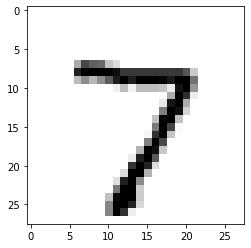

pred: 7, prob: 0.98, true: 7


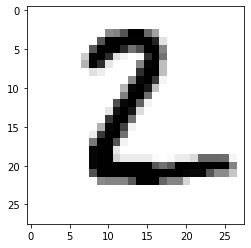

pred: 2, prob: 0.70, true: 2


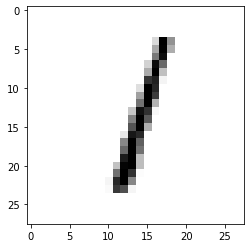

pred: 1, prob: 0.96, true: 1


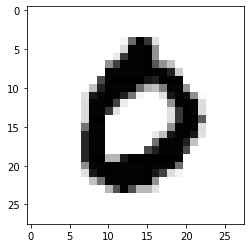

pred: 0, prob: 0.95, true: 0


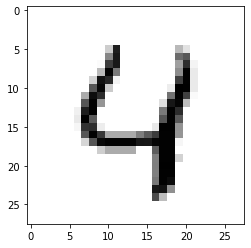

pred: 4, prob: 0.93, true: 4


In [17]:
import matplotlib.pyplot as plt
'''
# test on 3 sample
out = net.predict(x_test[0:3])
print("\n")
print("predicted values : ")
print(out, end="\n")
print("true values : ")
print(y_test[0:3])
'''
samples = 5
for test, true in zip(x_test[:samples], y_test[:samples]):
    image = np.reshape(test, (28, 28))
    plt.imshow(image, cmap='binary')
    plt.show()
    pred = net.predict(test)[0][0]
    idx = np.argmax(pred)
    idx_true = np.argmax(true)
    print('pred: %s, prob: %.2f, true: %d' % (idx, pred[idx], idx_true))